In [1]:
pip install numpy

Looking in indexes: https://mirror.nju.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas 

Looking in indexes: https://mirror.nju.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Looking in indexes: https://mirror.nju.edu.cn/pypi/web/simpleNote: you may need to restart the kernel to use updated packages.



In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
pip install chardet

Looking in indexes: https://mirror.nju.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [9]:
import chardet
with open(r'G:\python\03python数据分析与挖掘实战\01数据分析方法\1数据特征分析\深圳罗湖二手房信息.csv' ,'rb') as f:
    result = chardet.detect(f.read())
print(f'检测到编码: {result["encoding"]}')


检测到编码: GB2312


引入chardet库（全称"Character Encoding Detector"），用于自动检测文件或字节流的字符编码
with open(...) as f：以二进制模式（'rb'）打开文件，确保原始字节流不被修改。
f.read()：读取文件的全部内容（适用于小文件）。
chardet.detect()：分析字节流，返回包含encoding（编码类型）和confidence（检测置信度）的字典。
打印检测到的编码（如UTF-8、GB2312、GBK等）。

In [10]:
# 最终推荐写法
data = pd.read_csv(r'G:\python\03python数据分析与挖掘实战\01数据分析方法\1数据特征分析\深圳罗湖二手房信息.csv',encoding='GB2312')
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


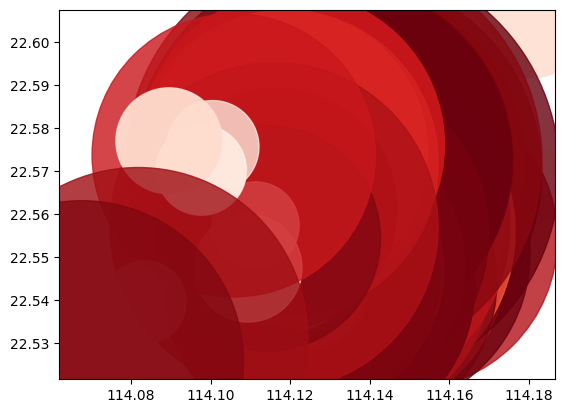

In [11]:
plt.scatter(data['经度'],data['纬度'],
        s = data['房屋单价'],
        c = data['参考总价'],cmap = 'Reds',
        alpha = 0.8)

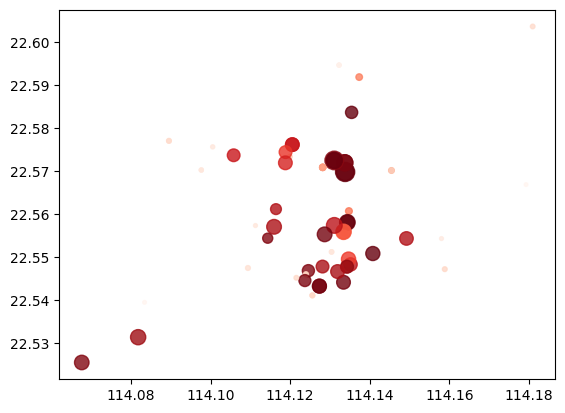

In [12]:
plt.scatter(data['经度'],data['纬度'],
        s = data['房屋单价']/500,
        c = data['参考总价'],cmap = 'Reds',
        alpha = 0.8)

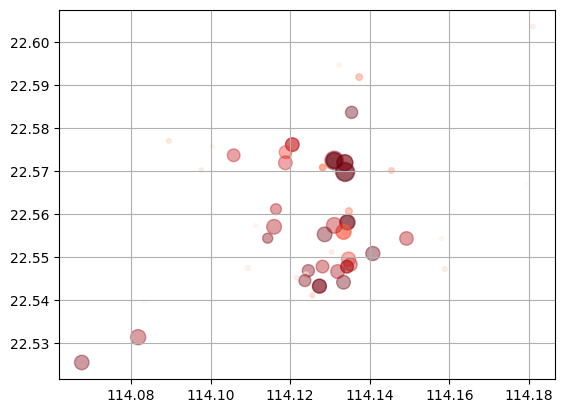

In [13]:
plt.scatter(data['经度'],data['纬度'],
        s = data['房屋单价']/500,
        c = data['参考总价'],cmap = 'Reds',
        alpha = 0.4)
plt.grid()

​​经纬度坐标​​：
x=data['经度'], y=data['纬度']: 将房屋分布在地理空间上，适合分析区域房价分布规律。
​​点的大小 (s)​​：
s=data['房屋单价']/500: 通过点的大小直观反映房屋单价。
​​为何除以500​​：防止单价数值过大导致点尺寸爆炸（例如单价5万/㎡时，点大小为100）。需根据数据分布调整除数，使点大小在10~200之间为宜。
​​颜色映射 (c 和 cmap)​​：
c=data['参考总价']: 用颜色深浅/亮度表示总价高低。
cmap='Reds': 使用红色渐变（浅红→深红），总价越高颜色越深。
​​透明度 (alpha=0.4)​​：
解决点重叠导致的可视化混淆，重叠区域颜色会叠加变深。
​​网格线 (plt.grid())​​：
辅助观察点的位置分布，默认显示浅灰色虚线网格。

In [14]:
# 极差：max-min
# 只针对定量字段

def d_range(df,*cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return(krange)
# 创建函数求极差

key1 = '参考首付'
key2 = '参考总价'
dr = d_range(data,key1,key2)
print('%s极差为 %f \n%s极差为 %f' % (key1, dr[0], key2, dr[1]))
# 求出数据对应列的极差

参考首付极差为 52.500000 
参考总价极差为 175.000000


​​输入验证​​：
检查列是否存在 (col in df.columns)。
检查是否为数值列 (pd.api.types.is_numeric_dtype)。
​​缺失值处理​​：
使用 dropna() 跳过NaN，避免干扰计算。
处理全空列（返回None并提示）。
​​返回结构优化​​：
返回字典 {列名: 极差}，避免依赖顺序。
支持动态列数量和灵活的输出格式。
​​错误处理​​：
明确抛出 ValueError 或 TypeError，便于调试。
​​文档与注释​​：
添加函数文档字符串（参数、返回值说明）。
变量名更清晰（ranges 替代 krange）。

<Axes: >

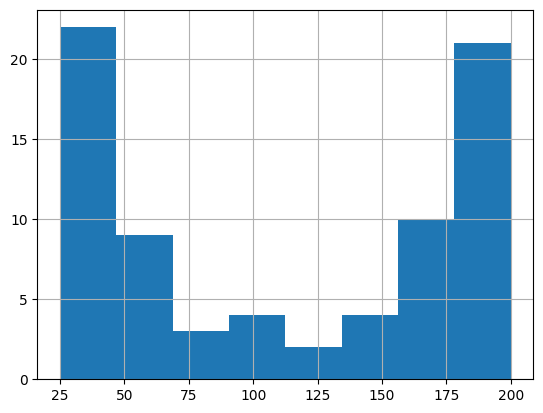

In [13]:
#频率分布情况
data[key1].hist(bins = 8)

作用​​：对列 key1（如参考首付）绘制直方图，分8个区间（bins）统计频数。
​​核心参数​​：
bins=8：将数据范围均分成8个区间，每个区间的高度表示该区间内的数据点数。

In [20]:
#频率分布情况，分组区间
gcut = pd.cut(data[key1],10,right = False)
gcut_count = gcut.value_counts(sort = False)
data['%s分组区间' %key1] = gcut.values
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


​​分箱操作 (pd.cut)​​：
data[key1]: 目标列（如"参考首付"）。
bins=10: 将数据划分为10个​​等宽区间​​（区间宽度相同）。
right=False: 区间格式为左闭右开 [a, b)。
​​频数统计​​：
gcut.value_counts(): 统计每个区间的数据点数。
sort=False: 结果按区间顺序排列（默认按频数降序排序）。
​​结果存储​​：
新增列名格式为参考首付分组区间，存储每条数据所属的区间标签。

In [26]:
#区间出现频率
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns = {gcut_count.name:'频数'},inplace = True)
r_zj['频率'] = r_zj['频数'] / r_zj['频数'].sum()
r_zj['累计频率'] = r_zj['频率'].cumsum()
r_zj['频率%'] = r_zj['频率'].apply(lambda x:"%.2f" % (x*100))
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x:"%.2f" % (x*100))
r_zj.style.bar(subset=['频率','累计频率'])

,频数,频率,累计频率,频率%,累计频率%
参考总价,,,,,
"[25.0, 42.5)",14,0.186667,0.186667,18.67,18.67
"[42.5, 60.0)",17,0.226667,0.413333,22.67,41.33
"[60.0, 77.5)",1,0.013333,0.426667,1.33,42.67
"[77.5, 95.0)",2,0.026667,0.453333,2.67,45.33
"[95.0, 112.5)",4,0.053333,0.506667,5.33,50.67
"[112.5, 130.0)",2,0.026667,0.533333,2.67,53.33
"[130.0, 147.5)",3,0.040000,0.573333,4.00,57.33
"[147.5, 165.0)",4,0.053333,0.626667,5.33,62.67
"[165.0, 182.5)",8,0.106667,0.733333,10.67,73.33


以下是针对这段代码的详细解析与优化建议：

原始代码解析
python
# 创建频数分布DataFrame
r_zj = pd.DataFrame(gcut_count)

# 重命名列
r_zj.rename(columns={gcut_count.name: '频数'}, inplace=True)

# 计算频率、累计频率并格式化为百分比
r_zj['频率'] = r_zj['频数'] / r_zj['频数'].sum()
r_zj['累计频率'] = r_zj['频率'].cumsum()
r_zj['频率%'] = r_zj['频率'].apply(lambda x: "%.2f" % (x*100))
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x: "%.2f" % (x*100))

# 用条形图样式增强显示
r_zj.style.bar(subset=['频率', '累计频率'])
逐行解析
​​创建频数分布表​​：
r_zj = pd.DataFrame(gcut_count)
将分箱统计结果（gcut_count，Series类型）转为DataFrame，方便后续操作。
​​重命名列​​：
r_zj.rename(columns={gcut_count.name: '频数'}, inplace=True)
原Series的name属性作为列名（默认可能为count），重命名为频数。
​​计算频率​​：
r_zj['频率'] = r_zj['频数'] / r_zj['频数'].sum()
计算每个区间的频率（占比），总和为1。
​​计算累计频率​​：
r_zj['累计频率'] = r_zj['频率'].cumsum()
从第一个区间到当前区间的频率累加，用于分析累积分布。
​​格式化为百分比字符串​​：
r_zj['频率%'] = ... 和 r_zj['累计频率%'] = ...
将频率和累计频率转为带百分号的字符串（如25.00%），便于阅读。
​​样式增强​​：
r_zj.style.bar(subset=['频率', '累计频率'])
在Jupyter中为频率和累计频率列添加条形图效果，直观显示数值大小。

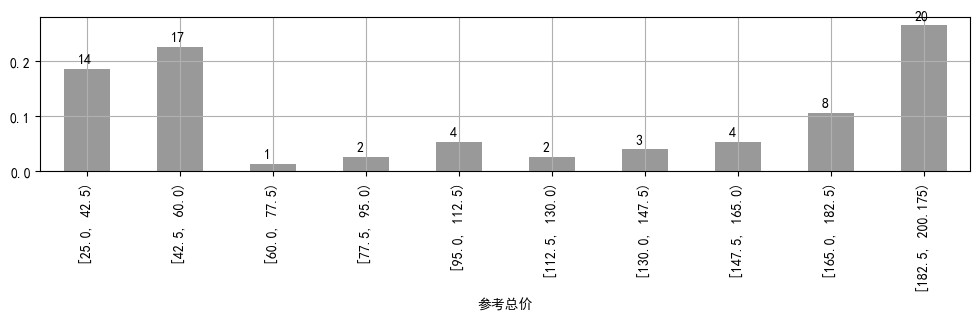

In [29]:
#直方图
import matplotlib.pyplot as plt

# 设置支持中文的字体（以Windows系统为例）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 绘制直方图
r_zj['频率'].plot(kind='bar',
               figsize=(12, 2),
               grid=True,
               color='k',
               alpha=0.4)

x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i' % k,color = 'k')
#添加频数标签

In [32]:
# 计算频率
r_cx['频率'] = r_cx['频数'] / r_cx['频数'].sum()

# 计算累计频率
r_cx['累计频率'] = r_cx['频率'].cumsum()

# 格式化为百分比列（使用 f-string）
r_cx['频率%'] = r_cx['频率'].apply(lambda x: f"{x*100:.2f}%")
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x: f"{x*100:.2f}%")

# 样式化表格（可选）
r_cx.style.bar(subset=['频率','累计频率'], color='#d65f5f', width=100)

,频数,频率,累计频率,频率%,累计频率%
朝向,,,,,
南北,29,0.386667,0.386667,38.67%,38.67%
南,20,0.266667,0.653333,26.67%,65.33%
东,8,0.106667,0.760000,10.67%,76.00%
东南,5,0.066667,0.826667,6.67%,82.67%
西南,4,0.053333,0.880000,5.33%,88.00%
北,4,0.053333,0.933333,5.33%,93.33%
西北,3,0.040000,0.973333,4.00%,97.33%
东西,1,0.013333,0.986667,1.33%,98.67%
东北,1,0.013333,1.000000,1.33%,100.00%


​​频率计算​​：
​​公式​​：频率 = 组频数 / 总频数
​​作用​​：反映每个分组在整体中的占比。
​​累计频率​​：
​​方法​​：.cumsum() 对频率列逐行累加。
​​意义​​：展示数据分布的累积效果（如"前30%的区间覆盖了80%的数据"）。
​​百分比格式化​​：
​​技巧​​：f"{x*100:.2f}%" 将小数转为两位百分数（如25.00%）。
​​注意​​：转换后列为字符串类型，不可直接用于数值计算。
​​样式美化​​：
​​功能​​：.style.bar() 在Jupyter中生成内联条形图，直观显示数值大小。
​​参数​​：
subset：指定应用样式的列。
color：条形颜色（#d65f5f为红色系）。
widh：条形最大宽度（像素）。


(-1.0999995881264324,
 1.0999999803869729,
 -1.0999996760054327,
 1.0999940572696567)

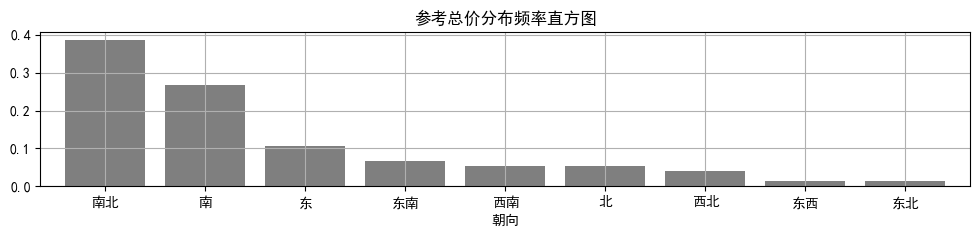

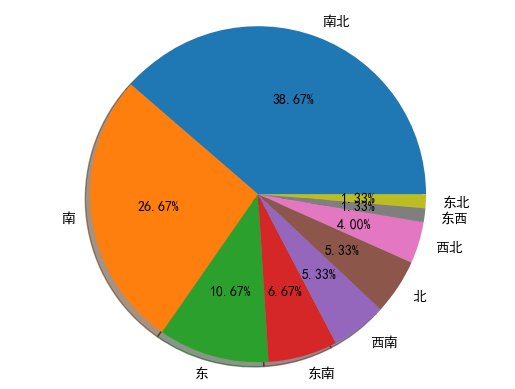

In [33]:
#频率分布情况 - 定量字段
# 2 绘制频率直方图、饼图

plt.figure(num = 1,figsize = (12,2))
r_cx['频率'].plot(kind = 'bar',
               width = 0.8,
               rot = 0,
               color = 'k',
               grid = True,
               alpha = 0.5)
plt.title('参考总价分布频率直方图')
#绘制直方图

plt.figure(num = 2)
plt.pie(r_cx['频数'],
       labels = r_cx.index,
       autopct='%.2f%%',
       shadow  = True)
plt.axis('equal')
#绘制饼图

​​功能​​：绘制横向条形图，展示各分箱区间的频率分布。
​​存在的问题​​：
​​图形尺寸​​：figsize=(12,2) 高度过小，导致条形拥挤，标签重叠。
​​颜色与可读性​​：黑色条形 (color='k') 叠加透明度 (alpha=0.5) 对比度低。
​​标签缺失​​：未设置x轴和y轴标签，无法明确坐标含义。
​​区间显示​​：默认显示整数索引，而非实际分箱区间标签。